# Aprendizaje Supervisado : Clasificación

Para esta parte del laboratorio, utilizaremos el método de clasificación; cuyo objetivo será explorar el dataset entregado ( caso_estudio.csv ) , donde debemos analizar y resolver las preguntas dejadas a continuación:

1. Analice el dataset entregado e identifique que encontró.
2. Para este estudio de clasificación, debemos realizarlo con los siguientes casos:
  
  2.1. Utilice todos los datos del dataset, si encuentra datos que no cuadran proponga alguna solución para poder dar solución al problema ( para este punto no borren las filas )
  
  2.2 Utilice los siguientes porcentajes de datos del dataset: 30% , 50% , 70% , 90% ¿ qué diferencias encuentra a la hora de realizar el estudio del dataset ?

  2.2.1 ¿ Qué cambios observa en los datos de entrenamiento y validación ? ¿ corresponde al 25% de los datos y 75% de los datos especificamente ? , argumente su respuesta.

  2.2.2 Documente los tiempos obtenidos y el porcentaje de precisión y realice una interpretación de los resultados obtenidos.

  2.2.3. Dibuje la matriz de confusión de los 2.2 e interprete los resultados de la misma

  2.2.4 ¿ Cuál porcentaje de uso del dataset considera que es ideal para el estudio ? , argumente su respuesta.

Pueden utilizar el codigo como crean conveniente , y pueden cambiar las variables que crean necesarias para dar solución al ejercicio.

  Fuentes para consultar:

  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  https://scikit-learn.org/stable/modules/model_evaluation.html

  https://scikit-learn.org/stable/modules/preprocessing.html


In [ ]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt
#subir archivo
from google.colab import files
#visualizaciòn netamente estadistica
import seaborn as sns
#calculador del estandar
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Generar gráficos
import matplotlib.pyplot as plt


In [ ]:
#Importa archivos desde la computadora
uploaded = files.upload()

Saving caso_estudio.csv to caso_estudio.csv


In [ ]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
diabetes_df = pd.read_csv('caso_estudio.csv')
# Mostrar información sobre el set de datos
diabetes_df.info()

diabetes_df.head()

# Contar los valores únicos de una columna en un DataFrame
diabetes_df['Outcome'].value_counts()

diabetes_df = diabetes_df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             733 non-null    float64
 4   Insulin                   766 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [ ]:
# Crearemos un nuevo df llamado X (notar mayus) con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar
lista_caract = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]
# Luego tomando esa lista del df original
X = diabetes_df[lista_caract]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.0,0.0,33.6,0.627,50
1,1,85,66.0,29.0,0.0,26.6,0.351,31
2,8,183,64.0,0.0,0.0,23.3,0.672,32
3,1,89,66.0,23.0,94.0,28.1,0.167,21
4,0,137,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['Outcome']
y = diabetes_df[lista_etiq]
y.head()


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)


In [ ]:
# Mostraremos la cantidad de datos a utilizar para el entrenamiento
X_train.shape
y_train.shape

(549, 1)

In [ ]:
# Luego, la cantidad de datos a utilizar para validar
X_test.shape
y_test.shape

(184, 1)

In [ ]:
# Definició del modelo que llamaremos clf
clf = SVC()

# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
clf.fit(X_train.values, y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))



Entrenamiento terminado en 0.020926237106323242 segundos


In [ ]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = clf.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

# Evaluamos la precisión
prec = accuracy_score(y_test, y_pred)
print(prec)

# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_diabetes = confusion_matrix(y_test, y_pred)
conf_diabetes


Predicción terminada en 0.010058164596557617 segundos
0.7663043478260869


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([[109,  10],
       [ 33,  32]])

In [ ]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = clf.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

Predicción terminada en 0.013881683349609375 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

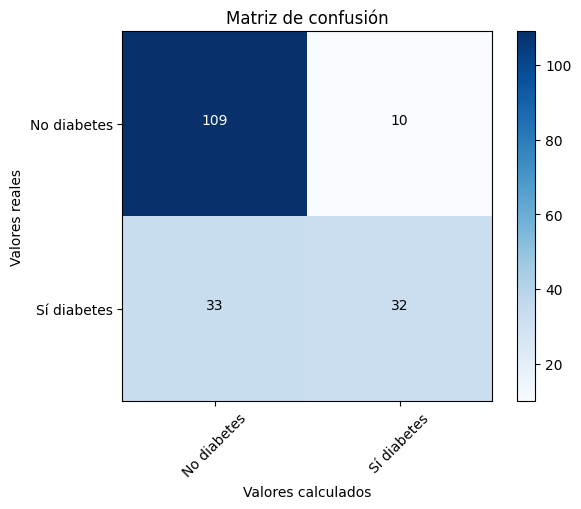

In [ ]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_diabetes)
# classes = las clases a predecir (si tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Sí diabetes'])